#**Avance 3. Creación de archivos para modelo de predicción**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Administración del Desarrollo de Software**
###**Tecnológico de Monterrey**
###**Prof. Mtro. Gilberto Carlo Grajales Aranao**

###**Equipo 1**

####**A01795313 – Karla Alejandra Fonseca Márquez**
####**A01795315 – Julia Gabriela Pinedo**
####**A01795838 – Javier Augusto Rebull Saucedo**
####**A00439670 – Ignacio Sáyago Vela**

**INTRODUCCIÓN**


En este documento se lleva a cabo la creación del archivo pickle necesario para que el modelo haga predicciones a partir de los datos recibidos


**IMPORTACIÓN DE LIBRERÍAS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from tabulate import tabulate

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Definimos la función para desplegar la matriz de confusión:
# (etiquetas_reales, etiquetas_de_predicciones)
def mi_cm(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  frecs = cm.flatten()

  txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
  vf = [ '( VN )', '( FP )', '( FN )', '( VP )']
  frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
  porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]
  porcentaje_por_categoría = [frecs[0]/(frecs[0]+frecs[1]),
                              frecs[1]/(frecs[0]+frecs[1]),
                              frecs[2]/(frecs[2]+frecs[3]),
                              frecs[3]/(frecs[2]+frecs[3])]
  porcentaje_por_categoría = ['{0:.1%}'.format(value) for value in porcentaje_por_categoría]

  labels = [f"{v1}\n{v2}\n{v3}\n{v4}\n{v5}" for v1, v2, v3, v4, v5 in zip(txt,vf, frecuencia,porcentaje,porcentaje_por_categoría)]
  labels = np.asarray(labels).reshape(2,2)

  plt.figure(figsize=(6,4))
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Pastel1', cbar=False)
  ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
  plt.show()

##**1) Carga de los dataframes generados en el Análisis Exploratorio de Datos**

In [4]:
# Se carga el archivo ZIP que contiene los dataframes generados en la actividad anterior

!unzip /content/my_data.zip


Archive:  /content/my_data.zip
 extracting: content/Dataset_VPAI/df.pkl  
 extracting: content/Dataset_VPAI/XtrainT.pkl  
 extracting: content/Dataset_VPAI/XvalT.pkl  
 extracting: content/Dataset_VPAI/XtestT.pkl  
 extracting: content/Dataset_VPAI/ytrainT.pkl  
 extracting: content/Dataset_VPAI/yvalT.pkl  
 extracting: content/Dataset_VPAI/ytestT.pkl  


In [5]:
# Se crean los dataframes vacíos

df_names = ['df','XtrainT','XvalT', 'XtestT', 'ytrainT', 'yvalT', 'ytestT']

for df_name in df_names:
  globals()[df_name] = pd.DataFrame()


In [6]:
# Se cargan los archivos Pickle en sus respectivos dataframes

import pickle

path = '/content/content/Dataset_VPAI/'

df_list = [df, XtrainT, XvalT, XtestT, ytrainT, yvalT, ytestT]


if len(df_names) == len(df_list):
  for i, df_name in enumerate(df_names):
    with open(path + df_name + '.pkl', 'rb') as file:

        if df_name == 'df':
          df = pickle.load(file)
        if df_name == 'XtrainT':
          XtrainT = pickle.load(file)
        if df_name == 'XvalT':
          XvalT = pickle.load(file)
        if df_name == 'XtestT':
          XtestT = pickle.load(file)
        if df_name == 'ytrainT':
          ytrainT = pickle.load(file)
        if df_name == 'yvalT':
          yvalT = pickle.load(file)
        if df_name == 'ytestT':
          ytestT = pickle.load(file)


In [7]:
display(df.head(5))
display(XtrainT.head(5))
display(XvalT.head(5))
display(XtestT.head(5))
display(ytrainT.head(5))
display(yvalT.head(5))
display(ytestT.head(5))


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,unit_of_wage,full_time_position,case_status,wage_range,no_of_employees_range,yr_of_estab_range
0,Asia,High School,N,N,14513,2007,West,Hour,Y,Denied,> 100000,> 3450,> 2002
1,Asia,Master's,Y,N,2412,2002,Northeast,Year,Y,Certified,50000-100000,2300-3450,> 2002
2,Asia,Bachelor's,N,Y,44444,2008,West,Year,Y,Denied,> 100000,> 3450,> 2002
3,Asia,Bachelor's,N,N,98,1897,West,Year,Y,Denied,50000-100000,< 1150,< 1987
4,Africa,Master's,Y,N,1082,2005,South,Year,Y,Certified,> 100000,< 1150,> 2002


,education_of_employee,has_job_experience,requires_job_training,full_time_position,wage_range,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,...,no_of_employees_range_> 3450,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,yr_of_estab_range_< 1987,yr_of_estab_range_> 2002
9036,0.458579,0,0,1,1.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21818,0.458579,0,0,1,0.000000,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
18343,1.000000,1,1,1,1.000000,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
12820,0.458579,0,1,1,0.486565,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
21719,0.458579,1,0,1,0.486565,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1


,education_of_employee,has_job_experience,requires_job_training,full_time_position,wage_range,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,...,no_of_employees_range_> 3450,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,yr_of_estab_range_< 1987,yr_of_estab_range_> 2002
18754,0.458579,0,0,1,0.486565,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
5834,1.000000,1,0,1,1.000000,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
6962,0.556686,0,0,1,0.486565,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
19174,0.458579,0,0,1,0.486565,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
21977,0.556686,1,0,1,0.486565,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


,education_of_employee,has_job_experience,requires_job_training,full_time_position,wage_range,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,...,no_of_employees_range_> 3450,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,yr_of_estab_range_< 1987,yr_of_estab_range_> 2002
755,0.000000,1,0,1,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
22508,0.458579,0,0,1,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
483,1.000000,1,0,1,0.0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1724,0.458579,0,1,1,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
14084,0.556686,0,0,1,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


,case_status
9036,0
21818,0
18343,0
12820,0
21719,1


,case_status
18754,1
5834,0
6962,1
19174,0
21977,0


,case_status
755,1
22508,1
483,0
1724,1
14084,1


Creamos una lista con las 7 variables de mayor importancia obtenidas por medio del análisis de ingeniería de características

In [8]:
list_7_vars = ['full_time_position',
 'region_of_employment_South',
 'continent_North America',
 'region_of_employment_Midwest',
 'continent_Europe',
 'has_job_experience',
 'education_of_employee']
list_7_vars

['full_time_position',
 'region_of_employment_South',
 'continent_North America',
 'region_of_employment_Midwest',
 'continent_Europe',
 'has_job_experience',
 'education_of_employee']

In [10]:
# Keep only the column names that appear in list_7_vars in the dataframes XtrainT_reduc, XvalT_reduc, and XtestT_reduc

XtrainT_reduc = XtrainT[list_7_vars]
XvalT_reduc = XvalT[list_7_vars]
XtestT_reduc = XtestT[list_7_vars]

# Verify the dataframes
print("XtrainT_reduc after reduction:")
print(XtrainT_reduc.head())
print("\nXvalT_reduc after reduction:")
print(XvalT_reduc.head())
print("\nXtestT_reduc after reduction:")
print(XtestT_reduc.head())

XtrainT_reduc after reduction:
       full_time_position  region_of_employment_South  \
9036                    1                           0   
21818                   1                           0   
18343                   1                           0   
12820                   1                           0   
21719                   1                           1   

       continent_North America  region_of_employment_Midwest  \
9036                         0                             0   
21818                        0                             0   
18343                        0                             0   
12820                        0                             0   
21719                        0                             0   

       continent_Europe  has_job_experience  education_of_employee  
9036                  0                   0               0.458579  
21818                 0                   0               0.458579  
18343                 1           

Entrenamos el modelo ajustando los pesos para mejorar las métricas de predicción

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate # Importing cross_validate function
from imblearn.pipeline import Pipeline

# Ajuste de hiperparámetros para QDA con Class Weigth -asignando pesos

w0 = 0.48
w1 = 1 -w0

pipe_qda_cwc = Pipeline(steps=[

                                ('qda_cwc' , QuadraticDiscriminantAnalysis(
                                              priors= [w0, w1],
                                              reg_param = 0.1
                                              ))

                              ])

x_train_data = XtrainT_reduc
y_train_data = np.ravel(ytrainT)

pipe_qda_cwc.fit(x_train_data, y_train_data)

# Se emplea validación cruzada con stratified k fold puesto que las clases están imbalanceadas

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(pipe_qda_cwc, x_train_data, y_train_data, cv=stratified_cv)

print(cv_results)

{'fit_time': array([0.03508878, 0.08544779, 0.09543991, 0.04825282, 0.05777812]), 'score_time': array([0.01694012, 0.01530004, 0.02186561, 0.01571965, 0.02227688]), 'test_score': array([0.65442825, 0.64087468, 0.63779086, 0.64255677, 0.65349033])}


------Resultados para el modelo Quadratic Discriminant Analysis con Pesos en las Clases------


-----Resultados para el conjunto de validación-----
              precision    recall  f1-score   support

           0       0.84      0.58      0.69      2553
           1       0.48      0.77      0.59      1269

    accuracy                           0.65      3822
   macro avg       0.66      0.68      0.64      3822
weighted avg       0.72      0.65      0.66      3822



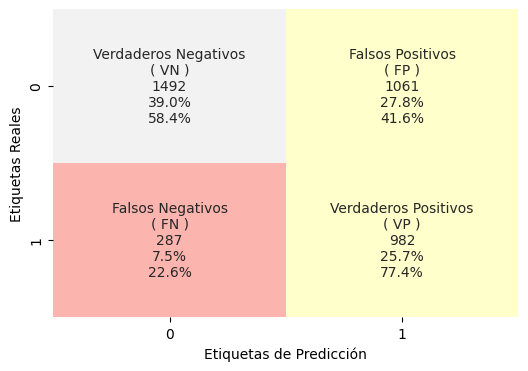

None


-----Resultados para el conjunto de prueba-----
              precision    recall  f1-score   support

           0       0.85      0.59      0.70      2553
           1       0.49      0.80      0.61      1269

    accuracy                           0.66      3822
   macro avg       0.67      0.69      0.65      3822
weighted avg       0.73      0.66      0.67      3822



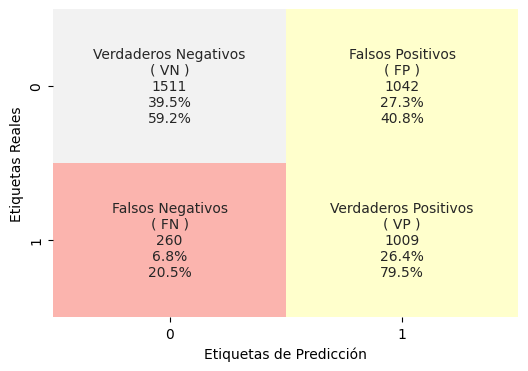

None


In [14]:

lista_modelo = [pipe_qda_cwc, 'Quadratic Discriminant Analysis con Pesos en las Clases']



print("------Resultados para el modelo " + lista_modelo[1] + "------")

# Se obtienen las probabilidades utilizando el threshold
y_pred_proba = lista_modelo[0].predict(XvalT_reduc)


y_pred = (y_pred_proba)

print("\n\n-----Resultados para el conjunto de validación-----")

print(classification_report(yvalT, y_pred))

print(mi_cm(yvalT,y_pred))

print("\n\n-----Resultados para el conjunto de prueba-----")

y_pred_proba = lista_modelo[0].predict(XtestT_reduc)

y_pred = (y_pred_proba)

print(classification_report(ytestT, y_pred))

print(mi_cm(ytestT,y_pred))

##**Con este modelo se obtiene predicen correctamente el 79.5% de los casos positivos y el 59.2% de los casos negativos, pero ya se puede utilizar para desarrollar un MVP. Posteriormente se deberá ir mejorando el modelo aplicando técnicas de ensamble (stacking) para mejorar las predicciones**

In [15]:
# prompt: the variable pipe_qda_cwc contains a model, create a script to save this model to a pickle file

# Save the model to a pickle file
with open('pipe_qda_cwc_model.pkl', 'wb') as file:
    pickle.dump(pipe_qda_cwc, file)

print("Model saved to pipe_qda_cwc_model.pkl")


Model saved to pipe_qda_cwc_model.pkl


In [16]:
y_pred_proba = lista_modelo[0].predict_proba(XtestT_reduc)

print(y_pred_proba)

[[0.34229682 0.65770318]
 [0.38393033 0.61606967]
 [0.51411325 0.48588675]
 ...
 [0.57327107 0.42672893]
 [0.39307218 0.60692782]
 [0.43487342 0.56512658]]


In [17]:
y_pred_proba = lista_modelo[0].predict(XtestT_reduc)

print(y_pred_proba)

[1 1 0 ... 0 1 1]
